In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv(r"D:\US_Accidents_March23.csv")

In [3]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [6]:
df.shape

(7728394, 46)

In [7]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'],errors='coerce')

In [8]:
for col in df.columns:
    print(col)

ID
Source
Severity
Start_Time
End_Time
Start_Lat
Start_Lng
End_Lat
End_Lng
Distance(mi)
Description
Street
City
County
State
Zipcode
Country
Timezone
Airport_Code
Weather_Timestamp
Temperature(F)
Wind_Chill(F)
Humidity(%)
Pressure(in)
Visibility(mi)
Wind_Direction
Wind_Speed(mph)
Precipitation(in)
Weather_Condition
Amenity
Bump
Crossing
Give_Way
Junction
No_Exit
Railway
Roundabout
Station
Stop
Traffic_Calming
Traffic_Signal
Turning_Loop
Sunrise_Sunset
Civil_Twilight
Nautical_Twilight
Astronomical_Twilight


C:\Users\NAVADEEP\AppData\Local\Temp\ipykernel_16436\1830797813.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index,y=state_counts.values,palette="rocket")


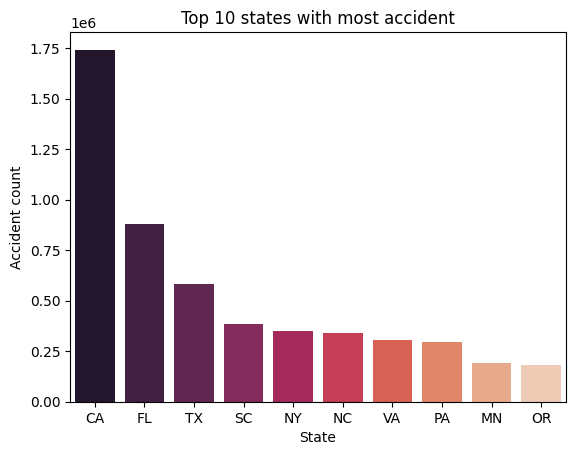

In [9]:
state_counts=df['State'].value_counts().head(10)
sns.barplot(x=state_counts.index,y=state_counts.values,palette="rocket")
plt.title("Top 10 states with most accident")
plt.xlabel("State")
plt.ylabel("Accident count")
plt.show()

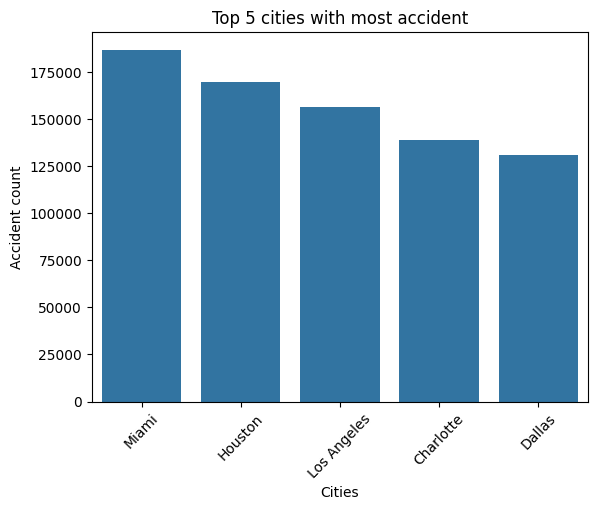

In [11]:
city_counts = df['City'].value_counts().head(5)
sns.barplot(x=city_counts.index,y=city_counts.values)
plt.title("Top 5 cities with most accident")
plt.xticks(rotation=46)
plt.xlabel("Cities")
plt.ylabel("Accident count")
plt.show()

C:\Users\NAVADEEP\AppData\Local\Temp\ipykernel_16436\3700644868.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=weather_counts.index, x=weather_counts.values, palette="coolwarm")


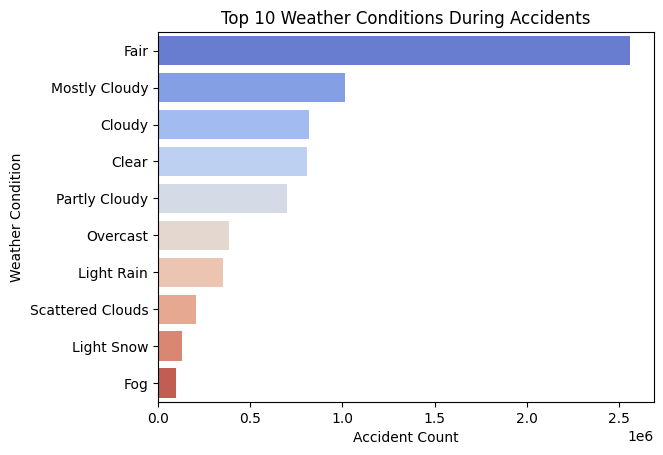

In [12]:
weather_counts = df['Weather_Condition'].value_counts().head(10)
sns.barplot(y=weather_counts.index, x=weather_counts.values, palette="coolwarm")
plt.title("Top 10 Weather Conditions During Accidents")
plt.xlabel("Accident Count")
plt.ylabel("Weather Condition")
plt.show()

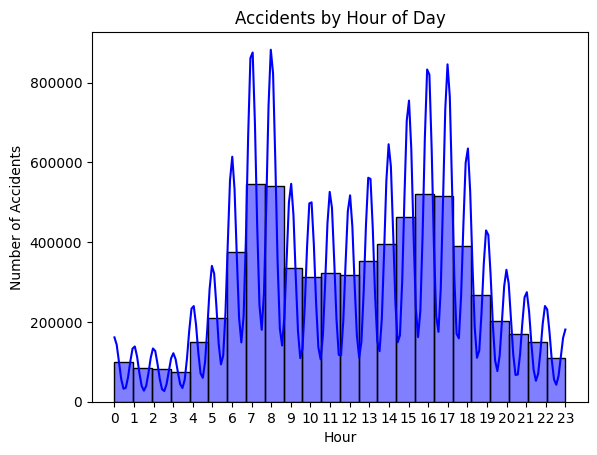

In [14]:
df['Hour'] = df['Start_Time'].dt.hour
sns.histplot(df['Hour'], bins=24, kde=True, color='blue')
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.xticks(range(0, 24))
plt.show()

C:\Users\NAVADEEP\AppData\Local\Temp\ipykernel_16436\3327392855.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="Set2")


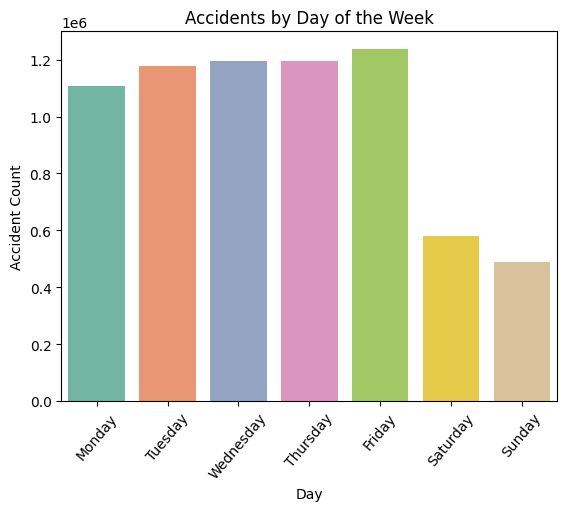

In [15]:
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
sns.countplot(x='DayOfWeek', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="Set2")
plt.title("Accidents by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Accident Count")
plt.xticks(rotation=50)
plt.show()


In [19]:
fig = px.scatter_mapbox(df.sample(3000), 
                        lat="Start_Lat", 
                        lon="Start_Lng", 
                        color="Severity", 
                        hover_data=["City", "State", "Weather_Condition"],
                        color_continuous_scale="reds", 
                        zoom=3, height=500)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Accident Hotspots in USA", margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

C:\Users\NAVADEEP\AppData\Local\Temp\ipykernel_16436\2316228757.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

